In [6]:
import pandas as pd

import yfinance as yf
from datetime import date

# get daily price TS from yahoo fin 
start_time = date.fromisoformat('2020-01-01')
end_time = date.fromisoformat('2020-12-31')

# 1.1 Importing gold ETF prices (GLD) for 2020
gld_df = yf.download('GLD', start_time, end_time, auto_adjust=True)
gld_series = gld_df[['Close']]

# 1.2 Importing equity ETF prices (MCHI) for 2020
mchi_df = yf.download('MCHI', start_time, end_time, auto_adjust=True)
mchi_series = mchi_df[['Close']]

# 1.2 Importing BTC-USD exch rate for 2020
import pandas_datareader as pdr
btc_series = pdr.get_data_yahoo(['BTC-USD'], 
                          start=start_time, 
                          end=end_time)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# 2.1 Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020
gld_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns

In [3]:
mchi_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # MCHI daily returns

In [5]:
btc_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # BTC-USD daily returns

In [11]:
# 3.1 Compute the returns for each series.   
gld_returns = gld_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns
mchi_returns = mchi_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns
btc_returns = btc_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # BTC-USD daily returns

In [13]:
# 3.2 Similarly, compute the kurtosis for each series.
gld_returns.kurtosis()

Close    3.982892
dtype: float64

In [14]:
mchi_returns.kurtosis()

Close    2.140012
dtype: float64

In [15]:
btc_returns.kurtosis()

Symbols
BTC-USD    2.852824
dtype: float64

<AxesSubplot:ylabel='Frequency'>

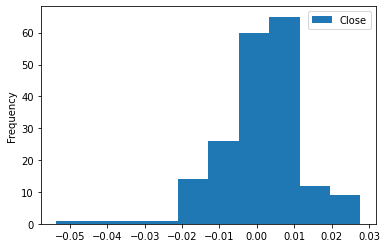

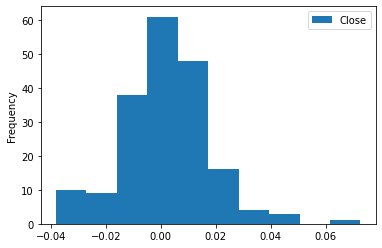

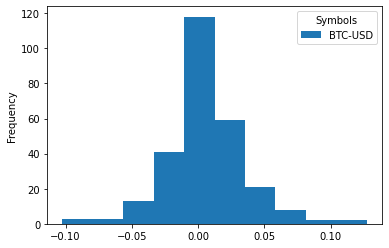

In [34]:
# 3.3 Use a common metric (BUT NOT 2 SIGMA), or derive your own, to identify an extreme value.  Explain your reasoning.
# We select using the 97.5th/2.5th percentile to determine outlier values. The following lines of code selects values greater than or equal to the 97.5 percentile or less or equal to the 0.025 percentile, for each return series.

# The following plots show the distribution of points for each return series.
gld_returns.plot.hist()
mchi_returns.plot.hist()
btc_returns.plot.hist()

In [42]:
# 3.4 Apply your metric to each of the return series.
gld_returns[gld_returns.ge(gld_returns.quantile(0.975))['Close']==True]
gld_returns[gld_returns.lt(gld_returns.quantile(0.025))['Close']==True]

,Close
Date,
2020-06-05,-0.020275
2020-08-11,-0.053694
2020-08-19,-0.031565
2020-09-23,-0.021606
2020-11-09,-0.044271


In [44]:
mchi_returns[mchi_returns.ge(mchi_returns.quantile(0.975))['Close']==True]
mchi_returns[mchi_returns.lt(mchi_returns.quantile(0.025))['Close']==True]

,Close
Date,
2020-05-01,-0.038179
2020-05-22,-0.037001
2020-06-11,-0.037837
2020-08-07,-0.032629
2020-11-10,-0.033029


In [43]:
btc_returns[btc_returns.ge(btc_returns.quantile(0.975))['BTC-USD']==True]
btc_returns[btc_returns.lt(btc_returns.quantile(0.025))['BTC-USD']==True]

Symbols,BTC-USD
Date,
2020-04-09,-0.059791
2020-05-09,-0.087292
2020-06-01,-0.062698
2020-06-10,-0.055553
2020-08-01,-0.060034
2020-09-02,-0.102395
2020-11-26,-0.084427


In [36]:
# 4.1 Pick 2 of the series  that had the most extreme values.

# Choose MCHI and BTC since they both showed some extreme moves to the donwside/upside at various points.

<AxesSubplot:xlabel='MCHI', ylabel='BTC-USD'>

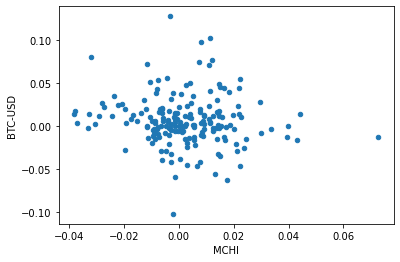

In [272]:
# 4.3 Graph the returns of those 2 series on an x-y plot.  Feel free to use either an individual quarter, or several quarters.
import matplotlib.pyplot as plt

merged_df = mchi_returns.merge(btc_returns, left_index=True, right_index=True)
merged_df=merged_df.rename(columns={"Close":"MCHI"})


merged_df.plot.scatter(x='MCHI', y='BTC-USD')

In [180]:
# 5.2 Use Q2 data for estimation, and Q3 data for evaluating performance.
# 5.5 The first strategy needs to include some form of ARMA.  

import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA, ARMA

hist_training = mchi_returns['2020-04-01':'2020-06-30']
hist_testing = mchi_returns['2020-07-01':'2020-09-30']

dict_aic = {}
for i in range(5):
    for j in range(4):
        try:
            model = ARIMA(hist_training, order=(i, 0, j))
            model_fit = model.fit(disp=4)
            dict_aic[(i, j)] = model_fit.aic
        except:
            pass
df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
i, j = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA order is ({i}, {0}, {j})')


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequenc

In [183]:
model = ARIMA(hist_training, order=(i, 0, j))
arima_fitted = model.fit(disp=4)
arima_fitted.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   63
Model:                     ARMA(4, 1)   Log Likelihood                 176.535
Method:                       css-mle   S.D. of innovations              0.014
Date:                Tue, 09 Feb 2021   AIC                           -339.070
Time:                        10:55:08   BIC                           -324.068
Sample:                             0   HQIC                          -333.170
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0025      0.000     11.456      0.000       0.002       0.003
ar.L1.Close     0.6639      0.122      5.448      0.000       0.425       0.903
ar.L2.Close     0.1241      0.149      0.833      0.405      -0.168       0.416
ar.L3.Close    -0.0091      0.150     -0.060      0.952      -0.304       0.286
ar.L4.Close    -0.2243      0.126     -1.785      0.074      -0.470       0.022
ma.L1.Close    -0.9999      0.057    -17.574      0.000      -1.111      -0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1070           -0.5578j            1.2396           -0.0743
AR.2            1.1070           +0.5578j            1.2396            0.0743
AR.3           -1.1273           -1.2771j            1.7035           -0.3651
AR.4           -1.1273           +1.2771j            1.7035            0.3651
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [195]:

return_predicted = arima_fitted.predict()
price_predicted = mchi_df['Close']['2020-07-01':'2020-09-30']*np.cumprod(1+return_predicted/100)


In [430]:
return_predicted
forecasted

array([0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035, 0.0021035,
       0.0021035, 0.0021035, 0.0021035])

In [204]:
forecasted, forecasted_std, forecasted_bounds = arima_fitted.forecast(hist_testing.shape[0])

return_expected = pd.DataFrame(forecasted, index=hist_testing.index)

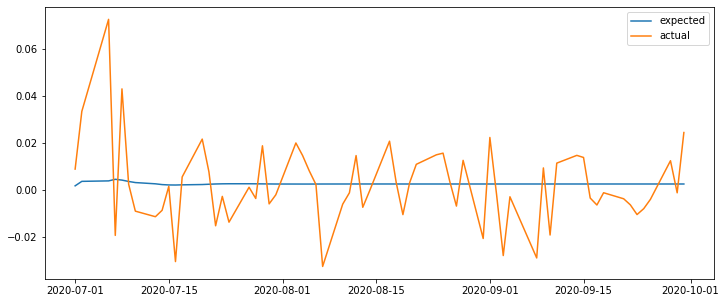

In [223]:
plt.figure(figsize=(12, 5))

plt.plot(return_expected[0], label='expected')
plt.plot(hist_testing['Close'], label='actual')
plt.legend()
plt.show()

In [509]:
# walk-forward backtest implementation, training window is rolled forward and the model retrained after each day

from datetime import datetime
from datetime import timedelta

results = pd.DataFrame()
data=[]

for datedelta in range(1,len(hist_testing)-30):
    end_date = datetime.strptime('2020-09-30',"%Y-%m-%d")
    end_date = end_date + timedelta(datedelta)
    dict_aic = {}
    for i in range(4):
        for j in range(4):
            try:
                model = ARIMA(mchi_returns['2020-07-01':end_date.strftime("%Y-%m-%d")], order=(i, 0, j))
                model_fit = model.fit(disp=4)
                dict_aic[(i, j)] = model_fit.aic
            except:
                pass
    df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
    i, j = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
    
    return_predicted = arima_fitted.predict()
    actual_date=end_date+timedelta(1)
    forecasted, forecasted_std, forecasted_bounds = arima_fitted.forecast(mchi_returns[actual_date.strftime("%Y-%m-%d"):'2020-10-30'].shape[0])
    return_expected = pd.DataFrame(forecasted, index=mchi_returns[actual_date.strftime("%Y-%m-%d"):'2020-10-30'].index)
    return_actual = mchi_returns[actual_date.strftime("%Y-%m-%d"):actual_date.strftime("%Y-%m-%d")]['Close'].iloc[0]
    values=[return_predicted[1], return_actual]
    data.append(values)
results = results.append(data, True)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequenc

IndexError: single positional indexer is out-of-bounds

In [516]:
# mchi_returns[actual_date.strftime("%Y-%m-%d"):actual_date.strftime("%Y-%m-%d")]['Close']
hist_testing.iloc[10]

TypeError: 'Index' object is not callable

In [503]:
# 5.3  Repeat, using Q3 data for estimation, and Q4 data for evaluating performance

hist_training = mchi_returns['2020-07-01':'2020-09-30']
hist_testing = mchi_returns['2020-10-01':'2020-12-31']

dict_aic = {}
for i in range(5):
    for j in range(4):
        try:
            model = ARIMA(hist_training, order=(i, 0, j))
            model_fit = model.fit(disp=4)
            dict_aic[(i, j)] = model_fit.aic
        except:
            pass
df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
i, j = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA order is ({i}, {0}, {j})')

model = ARIMA(hist_training, order=(i, 0, j))
arima_fitted = model.fit(disp=4)
arima_fitted.summary()

return_predicted = arima_fitted.predict()
price_predicted = mchi_df['Close']['2020-07-01':'2020-09-30']*np.cumprod(1+return_predicted/100)

forecasted, forecasted_std, forecasted_bounds = arima_fitted.forecast(hist_testing.shape[0])
return_expected = pd.DataFrame(forecasted, index=hist_testing.index)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequenc

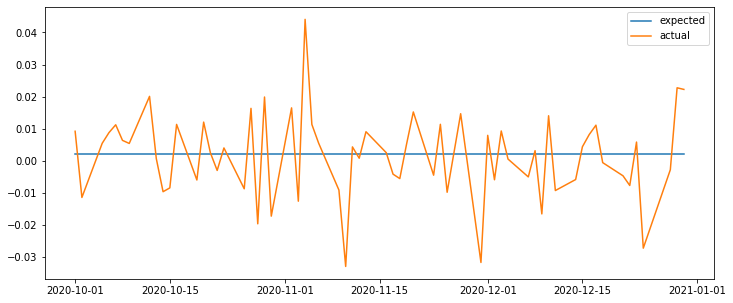

In [261]:
plt.figure(figsize=(12, 5))

plt.plot(return_expected[0], label='expected')
plt.plot(hist_testing['Close'], label='actual')
plt.legend()
plt.show()

In [255]:
# 5.6 The second strategy needs to include some form of GARCH.

from arch import arch_model
dict_aic = {}

for l in range(5):
    for p in range(1,5):
        for q in range(1,5):
            split_date = '2020-06-30'
            model = arch_model(mchi_returns['2020-04-01':'2020-09-30'], mean='ARX', lags=l, vol='Garch', p=p, o=0, q=q, dist='Normal')
            res = model.fit(last_obs=split_date)
            dict_aic[(l, p, q)] = res.aic

73,   Neg. LLF: -161.1785942339839
Iteration:      7,   Func. Count:     84,   Neg. LLF: 530506.9129089459
Iteration:      8,   Func. Count:     97,   Neg. LLF: -161.3219399320261
Iteration:      9,   Func. Count:    108,   Neg. LLF: -160.21806719703105
Iteration:     10,   Func. Count:    119,   Neg. LLF: -161.45109123583734
Iteration:     11,   Func. Count:    130,   Neg. LLF: 75.40501247110531
Iteration:     12,   Func. Count:    143,   Neg. LLF: -161.78176417777306
Iteration:     13,   Func. Count:    154,   Neg. LLF: -162.40694098992088
Iteration:     14,   Func. Count:    164,   Neg. LLF: -162.41493827764566
Iteration:     15,   Func. Count:    174,   Neg. LLF: -162.41879716976965
Iteration:     16,   Func. Count:    184,   Neg. LLF: -162.42122188958797
Iteration:     17,   Func. Count:    194,   Neg. LLF: -162.4221625025439
Iteration:     18,   Func. Count:    204,   Neg. LLF: -162.42285007969295
Iteration:     19,   Func. Count:    214,   Neg. LLF: -162.4229423855618
Iteration:

In [256]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.105
Mean Model:                        AR   Adj. R-squared:                  0.038
Vol Model:                      GARCH   Log-Likelihood:                162.664
Distribution:                  Normal   AIC:                          -297.328
Method:            Maximum Likelihood   BIC:                          -268.482
                                        No. Observations:                   58
Date:                Tue, Feb 09 2021   Df Residuals:                       44
Time:                        13:19:17   Df Model:                           14
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      4.1825e-03  2.073e-03      2.018  4.361e-02 [1.199e-04,8.245e-03]
Close[1]      -0.0945      0.139     -0.679      0.497     [ -0.367,  0.178]
Close[2]      -0.0290  9.108e-02     -0.319      0.750     [ -0.208,  0.149]
Close[3]      -0.0431      0.233     -0.185      0.853     [ -0.499,  0.413]
Close[4]      -0.2682      0.190     -1.411      0.158     [ -0.641,  0.104]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.5529e-05  5.227e-05      1.062      0.288 [-4.692e-05,1.580e-04]
alpha[1]       0.1173      0.108      1.088      0.276   [-9.398e-02,  0.329]
alpha[2]       0.0000      0.401      0.000      1.000      [ -0.785,  0.785]
alpha[3]       0.0000      0.160      0.000      1.000      [ -0.313,  0.313]
alpha[4]       0.0000      0.607      0.000      1.000      [ -1.189,  1.189]
beta[1]    5.1902e-14      0.483  1.074e-13      1.000      [ -0.947,  0.947]
beta[2]    1.0113e-12      0.518  1.952e-12      1.000      [ -1.015,  1.015]
beta[3]        0.5075      1.099      0.462      0.644      [ -1.646,  2.661]
beta[4]        0.1305      0.597      0.219      0.827      [ -1.039,  1.300]
=============================================================================

Covariance estimator: robust
"""

In [257]:
df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
l, p, q = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA-GARCH order is ({l}, {p}, {q})')

ARIMA-GARCH order is (0, 1, 1)


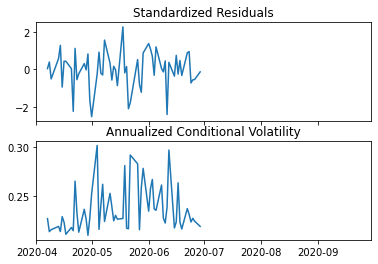

In [258]:
res.plot(annualize='D')
std_resid = res.resid / res.conditional_volatility
std_resid.dropna(inplace=True)

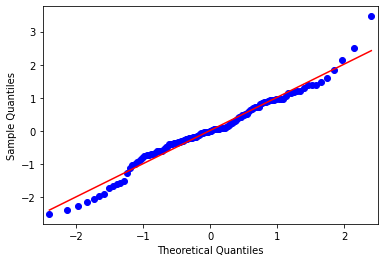

In [248]:
sm.qqplot(std_resid, line='s');

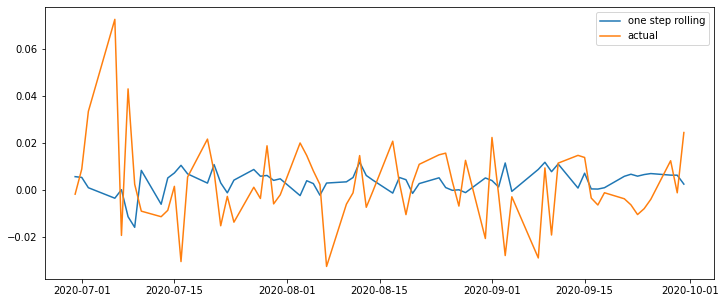

In [259]:
forecasts = res.forecast(horizon=1, start=split_date)

conf = np.sqrt(forecasts.variance[split_date:'2020-09-30'])*1.96

plt.figure(figsize=(12, 5))
plt.plot(forecasts.mean[split_date:'2020-09-30'], label='one step rolling')
plt.plot(mchi_returns[split_date:'2020-09-30'], label='actual')
plt.legend()
plt.show()

In [262]:
# 5.3  Repeat, using Q3 data for estimation, and Q4 data for evaluating performance (GARCH)

from arch import arch_model
dict_aic = {}

for l in range(5):
    for p in range(1,5):
        for q in range(1,5):
            split_date = '2020-09-30'
            model = arch_model(mchi_returns['2020-06-01':'2020-12-31'], mean='ARX', lags=l, vol='Garch', p=p, o=0, q=q, dist='Normal')
            res = model.fit(last_obs=split_date)
            dict_aic[(l, p, q)] = res.aic

            Gradient evaluations: 15
Iteration:      1,   Func. Count:     12,   Neg. LLF: 37987813.88035442
Iteration:      2,   Func. Count:     29,   Neg. LLF: 5204.004152053709
Iteration:      3,   Func. Count:     42,   Neg. LLF: 239.95580915855172
Iteration:      4,   Func. Count:     55,   Neg. LLF: -180.01092660205202
Iteration:      5,   Func. Count:     68,   Neg. LLF: -215.66233408912603
Iteration:      6,   Func. Count:     81,   Neg. LLF: -190.1830512061133
Iteration:      7,   Func. Count:     94,   Neg. LLF: -213.69597372408285
Iteration:      8,   Func. Count:    106,   Neg. LLF: -218.52899106653658
Iteration:      9,   Func. Count:    118,   Neg. LLF: -220.04286789247737
Iteration:     10,   Func. Count:    130,   Neg. LLF: -223.21492296243466
Iteration:     11,   Func. Count:    141,   Neg. LLF: -223.2373676727058
Iteration:     12,   Func. Count:    152,   Neg. LLF: -223.24022107395007
Iteration:     13,   Func. Count:    163,   Neg. LLF: -223.24057976234357
Iteratio

In [265]:
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.039
Mean Model:                        AR   Adj. R-squared:                 -0.012
Vol Model:                      GARCH   Log-Likelihood:                220.169
Distribution:                  Normal   AIC:                          -412.339
Method:            Maximum Likelihood   BIC:                          -378.817
                                        No. Observations:                   81
Date:                Tue, Feb 09 2021   Df Residuals:                       67
Time:                        13:29:09   Df Model:                           14
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const       1.7727e-03  1.650e-03      1.074      0.283 [-1.461e-03,5.007e-03]
Close[1]       -0.0284      0.176     -0.161      0.872      [ -0.374,  0.317]
Close[2]        0.1674      0.156      1.076      0.282      [ -0.137,  0.472]
Close[3]   -3.5691e-03      0.117 -3.055e-02      0.976      [ -0.233,  0.225]
Close[4]       -0.1234      0.104     -1.184      0.236    [ -0.328,8.079e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.5484e-05  3.344e-06      7.621  2.508e-14  [1.893e-05,3.204e-05]
alpha[1]   2.5000e-03  2.370e-02      0.105      0.916 [-4.396e-02,4.896e-02]
alpha[2]   2.5000e-03  3.993e-02  6.261e-02      0.950 [-7.576e-02,8.076e-02]
alpha[3]   2.5000e-03  5.293e-02  4.724e-02      0.962      [ -0.101,  0.106]
alpha[4]   2.5000e-03  8.404e-03      0.297      0.766 [-1.397e-02,1.897e-02]
beta[1]        0.2225      1.387      0.160      0.873      [ -2.497,  2.942]
beta[2]        0.2225      1.221      0.182      0.855      [ -2.171,  2.616]
beta[3]        0.2225      2.274  9.783e-02      0.922      [ -4.235,  4.680]
beta[4]        0.2225      0.544      0.409      0.682      [ -0.843,  1.288]
=============================================================================

Covariance estimator: robust
"""

In [266]:
df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
l, p, q = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA-GARCH order is ({l}, {p}, {q})')

ARIMA-GARCH order is (0, 1, 1)


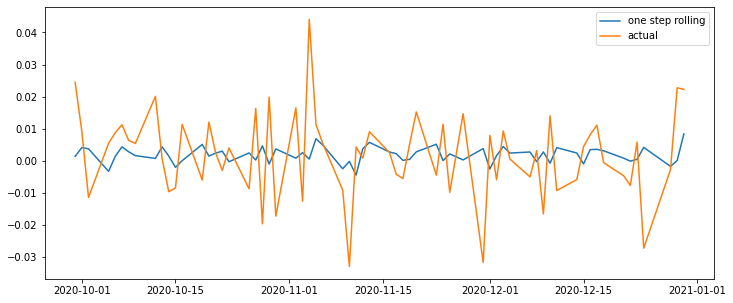

In [268]:
forecasts = res.forecast(horizon=1, start=split_date)

conf = np.sqrt(forecasts.variance[split_date:'2020-12-31'])*1.96

plt.figure(figsize=(12, 5))
plt.plot(forecasts.mean[split_date:'2020-12-31'], label='one step rolling')
plt.plot(mchi_returns[split_date:'2020-12-31'], label='actual')
plt.legend()
plt.show()

In [267]:
# 5.7 Which of the 2 models do you prefer?  Explain your answer in quantitative terms.

# The GARCH model seems be calibrated to the level of volatlity in the original return series much more closely than the ARMA model. The AR + GARCH terms probably better approximate the data compared with the ARMA approach.
# Additionally, the distribution of the residuals for the GARCH model is much more approximate to a normal distribution than the ARMA model.

In [317]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

price_chg_mchi = np.log(mchi_df['Close']) - np.log(mchi_df['Close'].shift(1)) 
price_chg_mchi = price_chg_mchi*100
price_chg_mchi.dropna(inplace=True)

price_chg_gld = np.log(gld_df['Close']) - np.log(gld_df['Close'].shift(1)) 
price_chg_gld = price_chg_gld*100
price_chg_gld.dropna(inplace=True)

data = pd.merge(price_chg_mchi, price_chg_gld, left_index=True, right_index=True)
data.rename(columns={'Close': 'Price'}, inplace=True)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [325]:
model = VAR(data['2020-04-01':'2020-06-30'])
ms = model.select_order(20) 
ms.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,0.8895,0.9714*,2.434,0.9197
1,0.8781,1.124,2.407*,0.9687
2,1.059,1.469,2.891,1.210
3,1.195,1.769,3.324,1.407
4,1.001,1.738,2.754,1.273
5,0.9194,1.820,2.567,1.252
6,0.9535,2.018,2.698,1.346
7,0.8540,2.083,2.497,1.307
8,0.8902,2.283,2.668,1.404
9,0.9804,2.537,3.038,1.554


In [326]:
# we see here that the AIC has a minimum at lag 20.
results = model.fit(maxlags=20, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Feb, 2021
Time:                     14:26:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.30321
Nobs:                     43.0000    HQIC:                 -0.816822
Log likelihood:           4.16148    FPE:                    4.98298
AIC:                     -2.05536    Det(Omega_mle):         1.30577
--------------------------------------------------------------------
Results for equation Close_x
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.869680         1.700553            0.511           0.609
L1.Close_x         -0.650399         0.805024           -0.808           0.419
L1.Close_y         -0.178546         1.680635           -0.106    

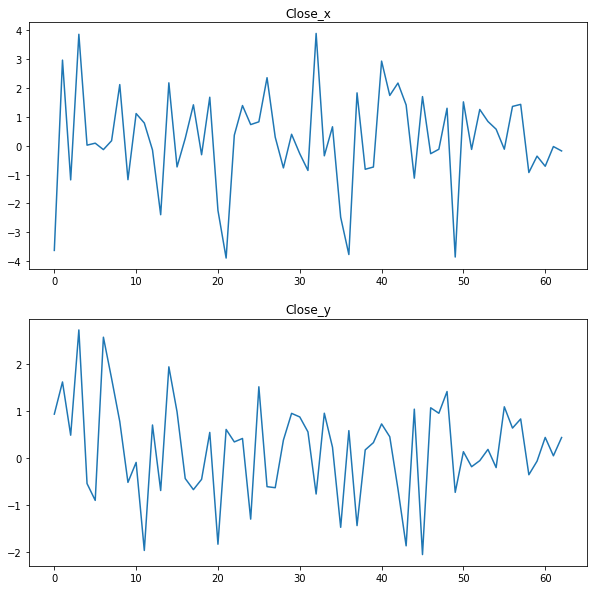

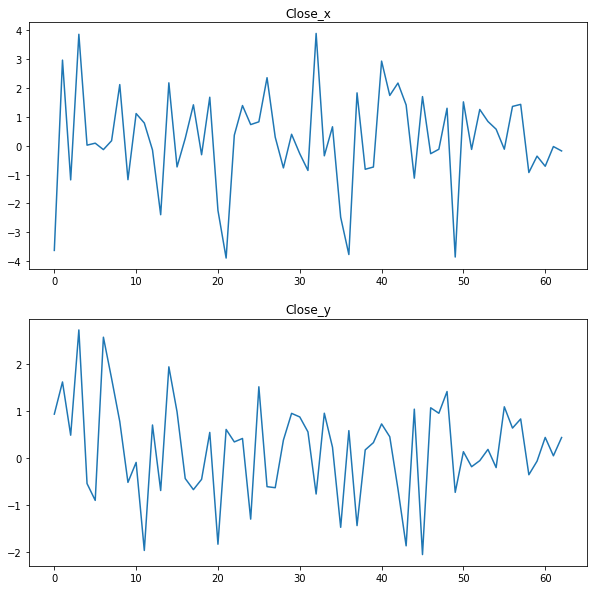

In [327]:
results.plot()

In [328]:
results.coefs

array([[[-0.65039862, -0.17854572],
        [-0.16014062, -1.03679271]],

       [[-0.36518031, -0.68168932],
        [-0.42125442,  0.06136093]],

       [[-0.27687223,  0.77529206],
        [-0.23407193, -0.41385105]],

       [[-0.01667042,  1.27457196],
        [-0.1185999 , -0.63473304]],

       [[ 0.17318538, -0.42537857],
        [-0.44953979, -0.53137032]],

       [[-0.36638745, -1.07577456],
        [-0.29965667,  0.42192533]],

       [[-0.85416476, -0.04831532],
        [ 0.36273559, -0.59506971]],

       [[-0.0482125 , -0.89277522],
        [ 0.02826181, -0.95998103]],

       [[ 0.56000791, -1.8102355 ],
        [-0.69540263, -0.38317157]],

       [[-0.04300272, -0.6109465 ],
        [-0.10166263, -0.98881178]],

       [[-0.30487062,  0.40929684],
        [ 0.28461416, -1.20776012]],

       [[ 0.02337193,  0.60567127],
        [-0.14865523, -1.18078646]],

       [[ 0.10833858, -0.21092406],
        [-0.68406712, -0.34860613]],

       [[-0.42921661, -0.2096801 ],
  

In [330]:
lag_order = results.k_ar
m, l, u = results.forecast_interval(data.values[-lag_order:], data['2020-07-01':'2020-09-30'].shape[0])

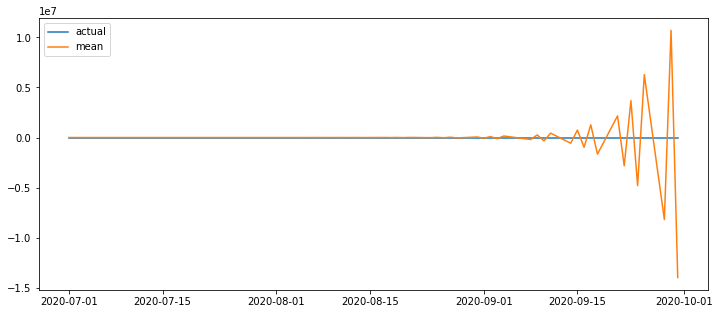

In [339]:

# Return forecast
plt.figure(figsize=(12, 5))
plt.plot(data['2020-07-01':'2020-09-30']['Close_y'], label='actual')
plt.plot(pd.DataFrame(m[:, 0], index=data['2020-07-01':'2020-09-30'].index), label='mean')
plt.legend()
plt.show()

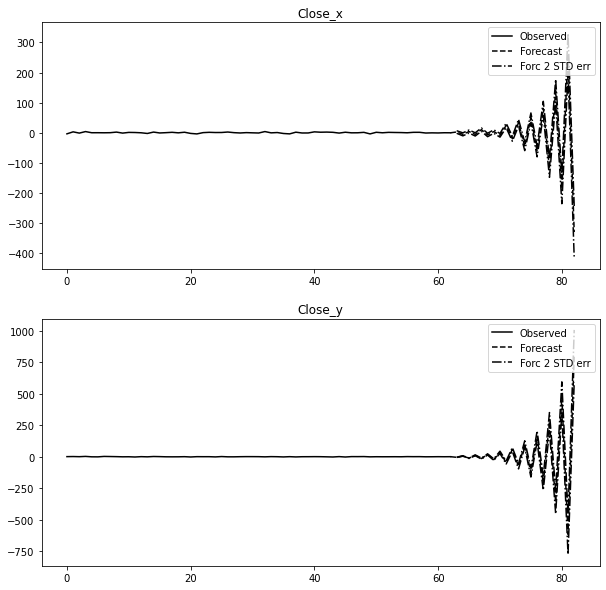

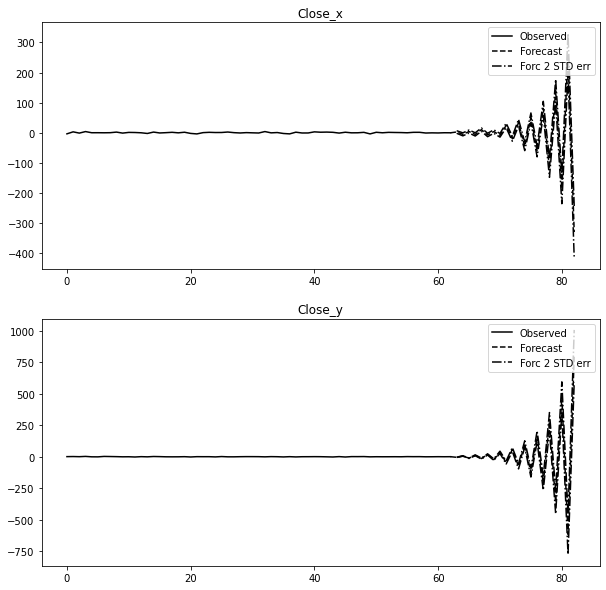

In [341]:
results.plot_forecast(20)

In [342]:
# 6.3 Repeat, using Q3 data for estimation, and Q4 data for evaluating performance
model = VAR(data['2020-07-01':'2020-09-30'])
ms = model.select_order(20) 
ms.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,1.258,1.339*,3.520*,1.288
1,1.408,1.652,4.091,1.499
2,1.515,1.920,4.557,1.665
3,1.640,2.207,5.181,1.850
4,1.638,2.368,5.206,1.909
5,1.722,2.614,5.718,2.053
6,1.556,2.610,4.916,1.947
7,1.626,2.842,5.380,2.077
8,1.779,3.158,6.447,2.290
9,1.908,3.449,7.609,2.480


In [343]:
results = model.fit(maxlags=20, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Feb, 2021
Time:                     15:12:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.03621
Nobs:                     44.0000    HQIC:                  0.944227
Log likelihood:          -36.5114    FPE:                    14.4679
AIC:                    -0.288873    Det(Omega_mle):         3.87680
--------------------------------------------------------------------
Results for equation Close_x
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.115080         0.602595           -0.191           0.849
L1.Close_x         -0.200378         0.841351           -0.238           0.812
L1.Close_y          0.103233         0.893930            0.115    

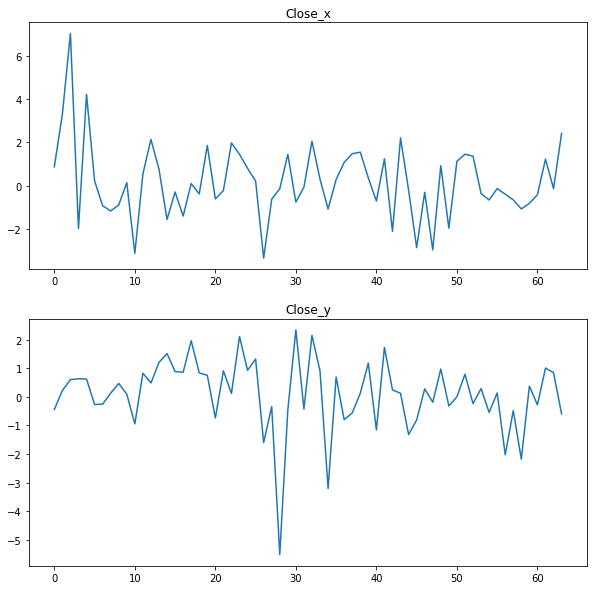

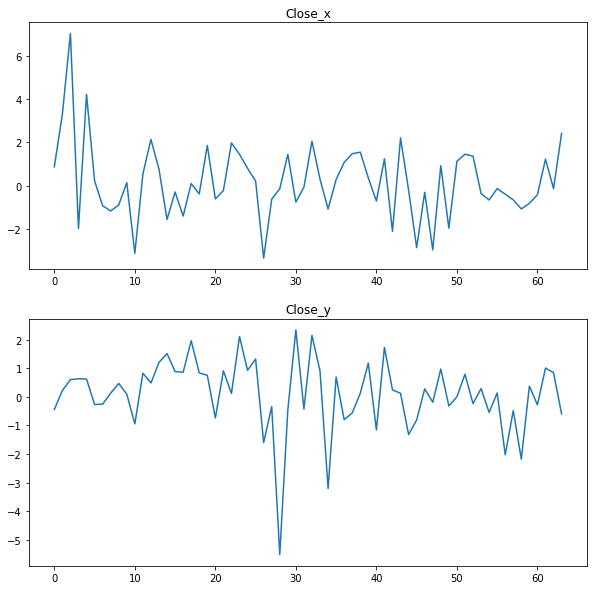

In [344]:
results.plot()

In [345]:
lag_order = results.k_ar
m, l, u = results.forecast_interval(data.values[-lag_order:], data['2020-07-01':'2020-09-30'].shape[0])

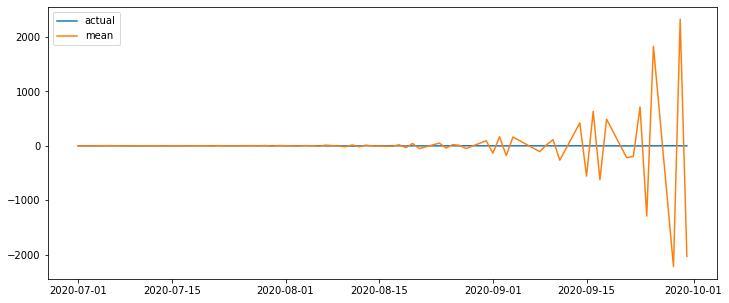

In [346]:
# Return forecast
plt.figure(figsize=(12, 5))
plt.plot(data['2020-07-01':'2020-09-30']['Close_y'], label='actual')
plt.plot(pd.DataFrame(m[:, 0], index=data['2020-07-01':'2020-09-30'].index), label='mean')
plt.legend()
plt.show()

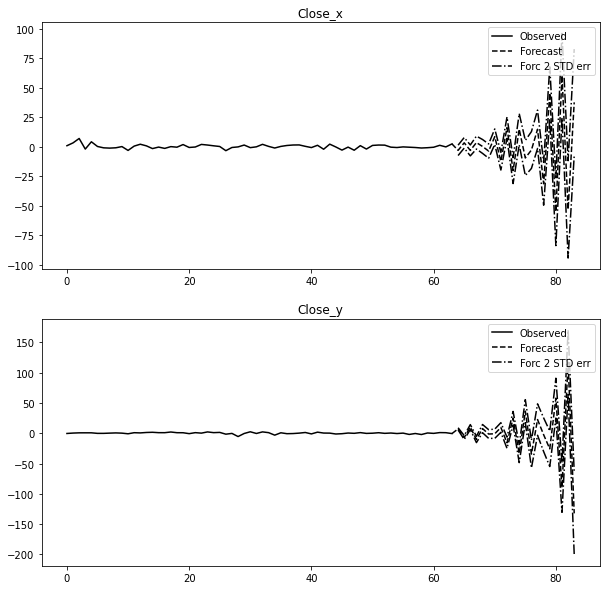

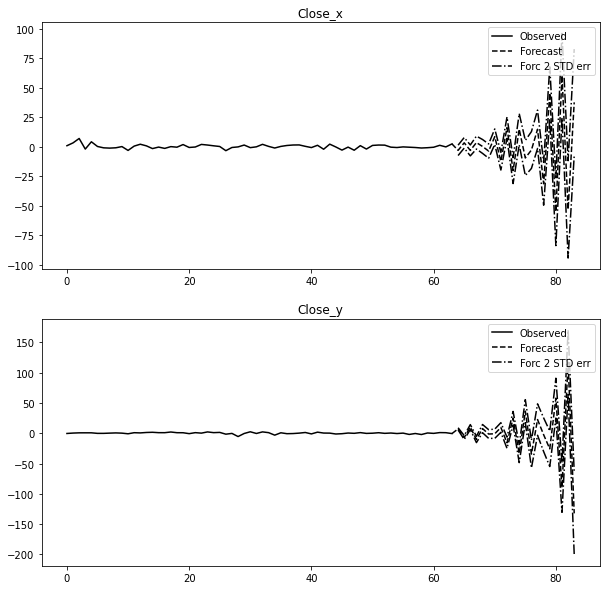

In [347]:
results.plot_forecast(20)

In [348]:
# 6.7 The 3rd strategy should attempt to include cointegration.  Note that if cointegration is not found, then justify the lack of existence for cointegration in quantitative terms.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

jh_results = coint_johansen(data['2020-04-01':'2020-06-30'], 0, 1)


In [353]:
v1=jh_results.evec[:,0]
v2=jh_results.evec[:,1]

In [354]:
print(jh_results.lr1) 

[54.59067874 24.79645056]


In [355]:
print(jh_results.cvt)

[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


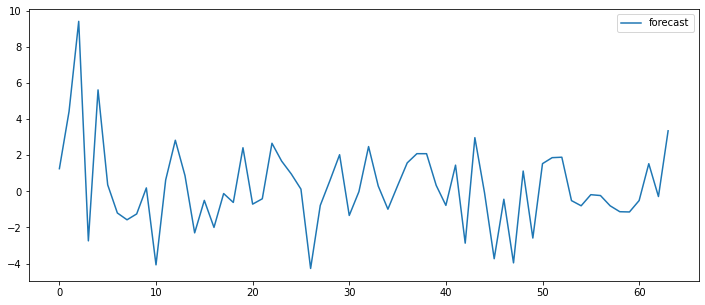

In [364]:
# Based on the t-statistic, the two time series appear to be cointegrated at the 99% confidence level.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(np.dot(data['2020-07-01':'2020-09-30'],v1) + np.dot(data['2020-07-01':'2020-09-30'],v2), label='forecast')

plt.legend()
plt.show()


In [365]:
# 6.7 The 3rd strategy should attempt to include cointegration.  Note that if cointegration is not found, then justify the lack of existence for cointegration in quantitative terms. (Q3-Q4)
from statsmodels.tsa.vector_ar.vecm import coint_johansen

jh_results = coint_johansen(data['2020-07-01':'2020-09-30'], 0, 1)

v1=jh_results.evec[:,0]
v2=jh_results.evec[:,1]

In [366]:
print(jh_results.lr1) 

[41.85544295 17.71373188]


In [367]:
print(jh_results.cvt)

[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


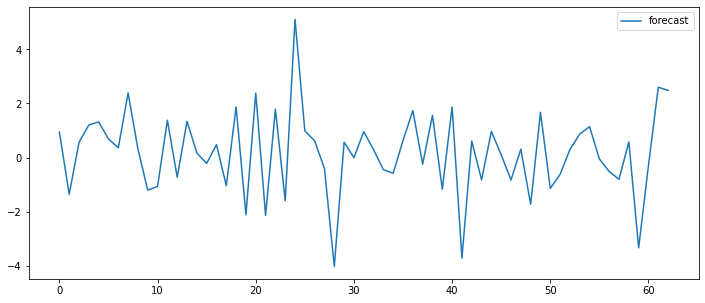

In [368]:
# Based on the t-statistic, the two time series appear to be cointegrated at the 99% confidence level.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(np.dot(data['2020-10-01':'2020-12-31'],v1) + np.dot(data['2020-10-01':'2020-12-31'],v2), label='forecast')

plt.legend()
plt.show()

In [ ]:
# 6.8 Now you have a total of 5 models (including 2 from the previous question).  Which of the 5 models do you prefer? Explain in quantitative terms

# I think the cointegration model has the best performance out of all of them, seen in the mean-reverting behavior in the out-of-sample tests, both for Q3 and Q4. The test statistic also gave us an indication of the strong relationship between these two variables (MCHI ETF and BTC-USD). The relationship seems to have basis in real life, due to China's outsize role in Bitcoin mining and the presumable large impact it has on the price.
# The cointegration relationship is also the easiest to understand, in the sense that it is simply a relationship developed around the mean-reverting nature of the spread between the two return series.

In [369]:
btc_series

Symbols,BTC-USD
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383
...,...
2020-12-28,27084.808594
2020-12-29,27362.437500
2020-12-30,28840.953125


In [371]:
# 7.1 Use the same series as you did in the previous question.  Call it y
# 7.2 Use Q2 data for estimation, and Q3 data for evaluating performance.
# 7.3 Repeat, using Q3 data for estimation, and Q4 data for evaluating performance
# 7.4 Build 3 trading strategies.  
# 7.5 The 1st strategy should include a form of VAR or VARMA.  

price_chg_mchi = np.log(mchi_df['Close']) - np.log(mchi_df['Close'].shift(1)) 
price_chg_mchi = price_chg_mchi*100
price_chg_mchi.dropna(inplace=True)

price_chg_gld = np.log(gld_df['Close']) - np.log(gld_df['Close'].shift(1)) 
price_chg_gld = price_chg_gld*100
price_chg_gld.dropna(inplace=True)

price_chg_btc = np.log(btc_series['BTC-USD']) - np.log(btc_series['BTC-USD'].shift(1)) 
price_chg_btc = price_chg_btc*100
price_chg_btc.dropna(inplace=True)

data = pd.merge(price_chg_mchi, price_chg_gld, left_index=True, right_index=True).merge(price_chg_btc, left_index=True, right_index=True)
data.rename(columns={'Close': 'Price'}, inplace=True)


In [372]:
data.head()

,Close_x,Close_y,BTC-USD
Date,,,
2020-01-03,-1.890029,1.318127,5.017175
2020-01-06,-0.169396,1.043487,4.716147
2020-01-07,0.430645,0.392743,4.952689
2020-01-08,0.291155,-0.752980,-1.032167
2020-01-09,1.080601,-0.566768,-2.516485


In [376]:
model = VAR(data['2020-04-01':'2020-06-30'])
ms = model.select_order(14) 
ms.summary()


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,2.906,3.023*,18.28*,2.950
1,2.905,3.373,18.29,3.082
2,3.166,3.984,23.86,3.475
3,3.369,4.538,29.59,3.811
4,2.987,4.507,20.66,3.561
5,2.942,4.813,20.51,3.649
6,2.866,5.088,20.16,3.706
7,2.854,5.427,21.66,3.827
8,2.889,5.813,25.25,3.994
9,2.981,6.255,32.65,4.218


In [378]:
results = model.fit(maxlags=14, ic='aic')
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Feb, 2021
Time:                     15:40:56
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.03879
Nobs:                     48.0000    HQIC:                   1.91034
Log likelihood:          -75.5656    FPE:                    28.1965
AIC:                   0.00993417    Det(Omega_mle):         4.13805
--------------------------------------------------------------------
Results for equation Close_x
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               1.345491         0.666374            2.019           0.043
L1.Close_x          0.505184         0.400600            1.261           0.207
L1.Close_y         -0.175760         0.663537           -0.265    

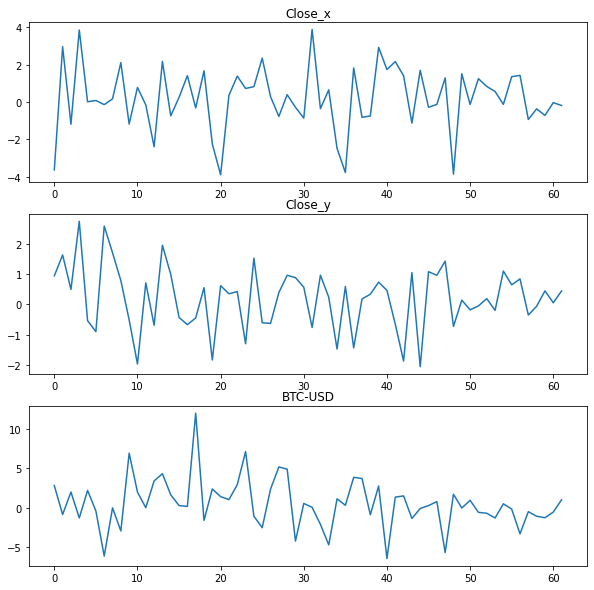

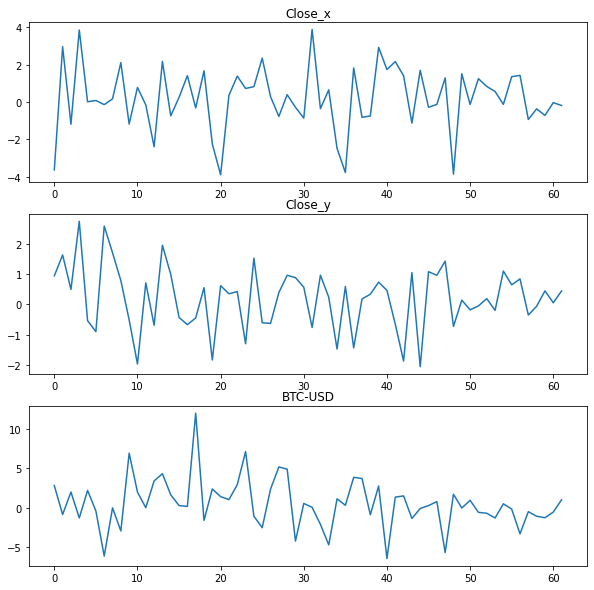

In [379]:
results.plot()

In [380]:
lag_order = results.k_ar
m, l, u = results.forecast_interval(data.values[-lag_order:], data['2020-07-01':'2020-09-30'].shape[0])

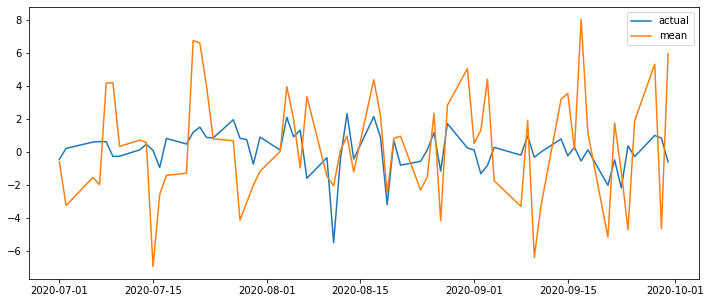

In [381]:
# Return forecast
plt.figure(figsize=(12, 5))
plt.plot(data['2020-07-01':'2020-09-30']['Close_y'], label='actual')
plt.plot(pd.DataFrame(m[:, 0], index=data['2020-07-01':'2020-09-30'].index), label='mean')
plt.legend()
plt.show()

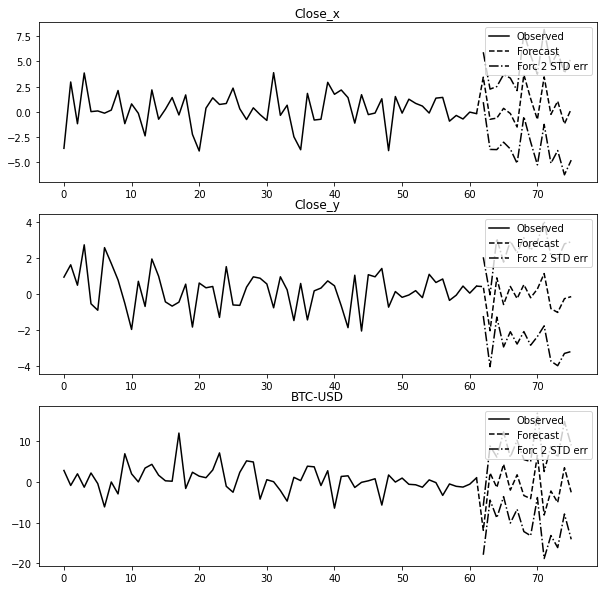

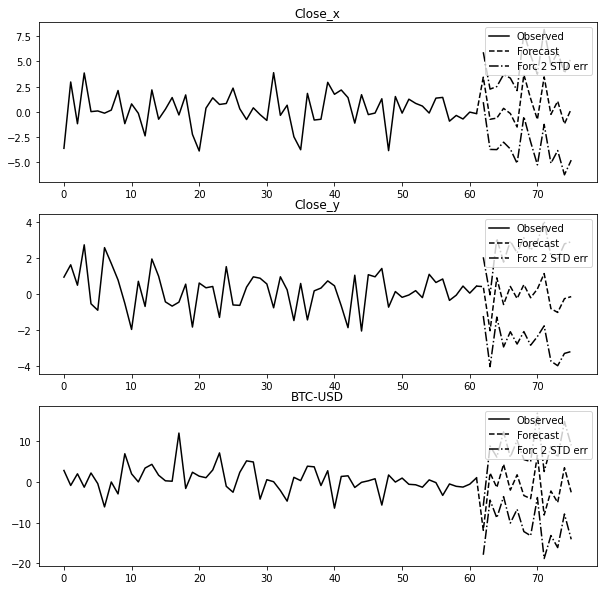

In [382]:
results.plot_forecast(14)

In [384]:
# Repeat, using Q3 data for estimation, and Q4 data for evaluating performance
model = VAR(data['2020-07-01':'2020-09-30'])
ms = model.select_order(15) 
ms.summary()


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,3.067,3.183,21.48,3.111
1,3.060,3.523,21.35,3.236
2,3.315,4.126,27.68,3.623
3,3.474,4.632,32.82,3.913
4,3.637,5.143,39.49,4.208
5,3.797,5.650,48.02,4.500
6,3.752,5.952,48.43,4.587
7,3.955,6.504,64.20,4.922
8,4.004,6.899,75.22,5.102
9,4.084,7.327,94.95,5.315


In [385]:
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Feb, 2021
Time:                     15:43:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.85080
Nobs:                     49.0000    HQIC:                  -7.15736
Log likelihood:           154.296    FPE:                  0.0117295
AIC:                     -9.17879    Det(Omega_mle):      0.00160953
--------------------------------------------------------------------
Results for equation Close_x
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.171920         0.268915            0.639           0.523
L1.Close_x         -0.018389         0.393747           -0.047           0.963
L1.Close_y         -0.104127         0.273089           -0.381    

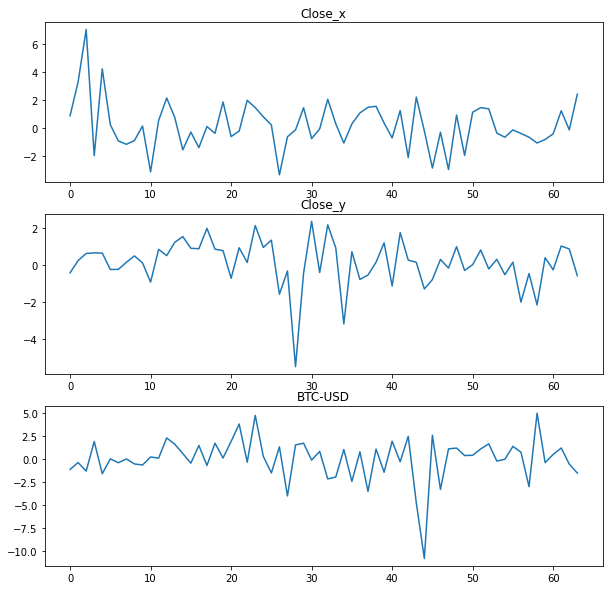

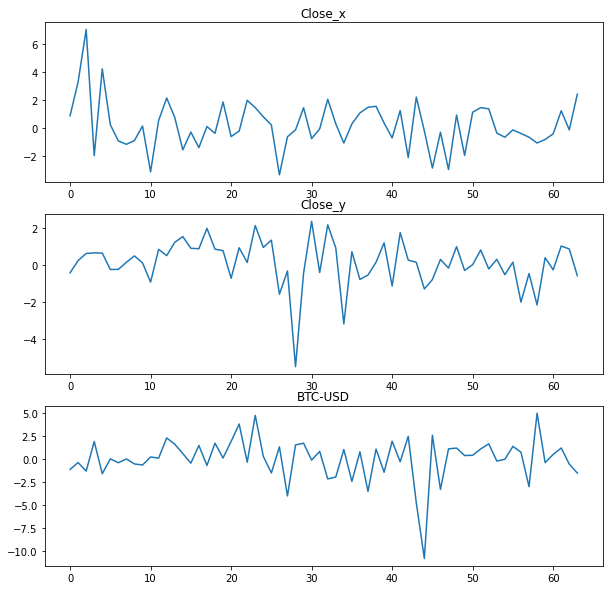

In [386]:
results.plot()


In [387]:
results.coefs


array([[[-0.01838883, -0.10412693,  0.40026126],
        [ 0.21383204, -0.11652797, -0.26787359],
        [-0.55554158, -1.23854284, -1.31759319]],

       [[-0.32342762,  0.6371587 ,  0.06551114],
        [ 1.07204514, -0.14236004,  0.14861249],
        [-0.44994925, -1.51419292, -0.56104334]],

       [[ 0.25781632, -0.17007591,  0.10748383],
        [-0.33992889, -0.12403864, -0.02926109],
        [-0.47902845, -0.41554895,  0.02669532]],

       [[-0.11677094,  0.02222049,  0.02962804],
        [-0.67665671, -0.55902034,  0.21110275],
        [-0.68416519, -0.74737019,  0.18830819]],

       [[ 0.17731376, -0.07022017,  0.18115278],
        [ 0.17068449,  0.07856603,  0.15419302],
        [-1.85701092,  0.41045   ,  0.49063052]],

       [[-0.06023562,  0.27615633, -0.28074921],
        [-0.3464336 ,  1.46925937,  0.21186368],
        [-0.97681446,  1.09215284,  0.42394374]],

       [[ 0.02406911,  0.29284084, -0.1081039 ],
        [-0.09023927, -0.37250795, -0.1052741 ],
        

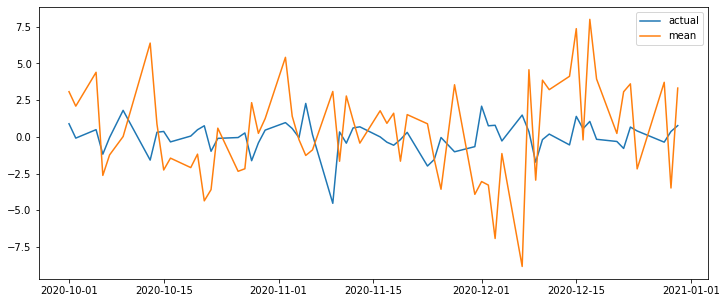

In [390]:
lag_order = results.k_ar
m, l, u = results.forecast_interval(data.values[-lag_order:], data['2020-10-01':'2020-12-31'].shape[0])

# Return forecast
plt.figure(figsize=(12, 5))
plt.plot(data['2020-10-01':'2020-12-31']['Close_y'], label='actual')
plt.plot(pd.DataFrame(m[:, 0], index=data['2020-10-01':'2020-12-31'].index), label='mean')
plt.legend()
plt.show()

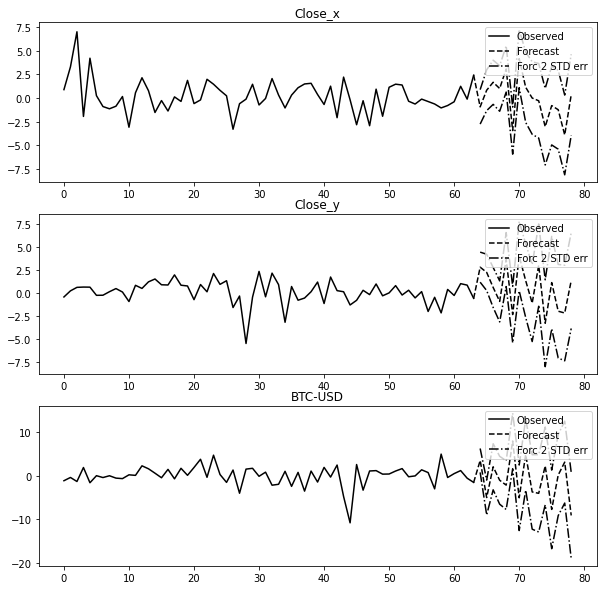

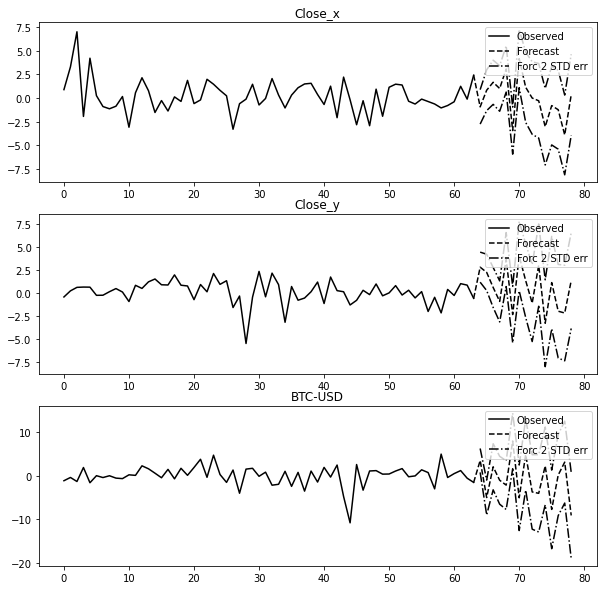

In [392]:
results.plot_forecast(15)

In [398]:
# 7.6 The 2nd strategy should attempt to include cointegration.  Note there can be cointegration between (y, x1);  or (y; x2);  or(y, x1, x2).  If none of these cointegrations exists, then justify the lack of existence for cointegration in quantitative terms.


# We test BTC, MCHI and GLD, having already tested BTC and MCHI previously.

jh_results = coint_johansen(data['2020-04-01':'2020-07-30'], 0, 1)

v1=jh_results.evec[:,0]
v2=jh_results.evec[:,1]
v3=jh_results.evec[:,2]

In [399]:
print(jh_results.cvt)

[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [400]:
print(jh_results.lr1) 


[96.96988758 60.33324699 27.74052403]


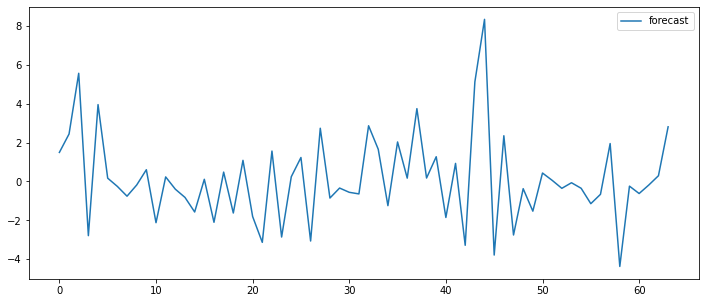

In [397]:
# Based on the t-statistic, the two time series appear to be cointegrated at the 99% confidence level.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(np.dot(data['2020-07-01':'2020-09-30'],v1) + np.dot(data['2020-07-01':'2020-09-30'],v2), label='forecast')

plt.legend()
plt.show()

In [401]:
# Repeat, using Q3 data for estimation, and Q4 data for evaluating performance

jh_results = coint_johansen(data['2020-07-01':'2020-09-30'], 0, 1)

v1=jh_results.evec[:,0]
v2=jh_results.evec[:,1]
v3=jh_results.evec[:,2]

In [402]:
print(jh_results.cvt)

[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [403]:
print(jh_results.lr1) 

[70.63826722 42.90419814 17.99590962]


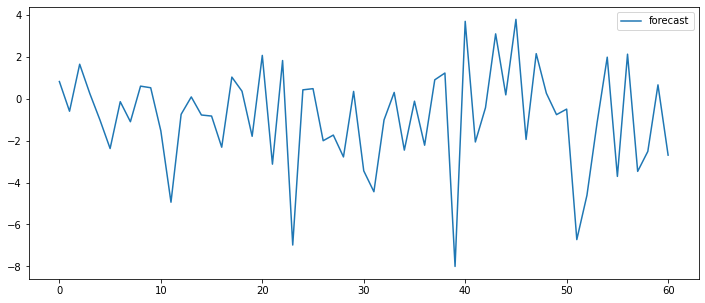

In [404]:
# Based on the t-statistic, the two time series appear to be cointegrated at the 99% confidence level.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(np.dot(data['2020-10-01':'2020-12-31'],v1) + np.dot(data['2020-10-01':'2020-12-31'],v2), label='forecast')

plt.legend()
plt.show()

In [405]:
# 7.5 The 3rd strategy should attempt to include an error-correction model (ECM).  This will only work if there is cointegration in the previous part.

# 7.3 If yes, run a Vector Error Correction Model and interpret the results.  If no, re-test for cointegration using Engle-Granger
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.base.datetools import dates_from_str

model = VECM(data['2020-04-01':'2020-07-30'])
vecm_res = model.fit()
vecm_res.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,coef,std err,z,P>|z|,[0.025,0.975]
L1.Close_x,-0.4188,0.096,-4.346,0.000,-0.608,-0.230
L1.Close_y,0.1508,0.189,0.798,0.425,-0.219,0.521
L1.BTC-USD,0.2417,0.076,3.200,0.001,0.094,0.390
,coef,std err,z,P>|z|,[0.025,0.975]
L1.Close_x,-0.1140,0.051,-2.237,0.025,-0.214,-0.014
L1.Close_y,-0.3366,0.100,-3.368,0.001,-0.532,-0.141
L1.BTC-USD,-0.0291,0.040,-0.728,0.467,-0.107,0.049
,coef,std err,z,P>|z|,[0.025,0.975]
L1.Close_x,0.3894,0.146,2.675,0.007,0.104,0.675
L1.Close_y,-0.7113,0.285,-2.492,0.013,-1.271,-0.152


In [414]:
prediction= vecm_res.predict(data['2020-07-01':'2020-09-30'].shape[0])

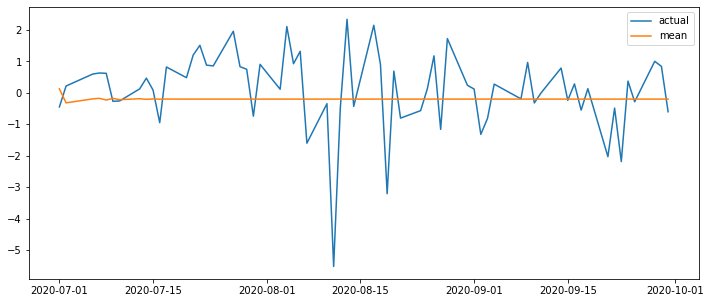

In [418]:
plt.figure(figsize=(12, 5))
plt.plot(data['2020-07-01':'2020-09-30']['Close_y'], label='actual')
plt.plot(pd.DataFrame(prediction[:, 0], index=data['2020-07-01':'2020-09-30'].index), label='mean')
plt.legend()
plt.show()

In [419]:
# 7.8 Now you have a total of 8 models (including 5 from the previous 2 questions).  Which of the 8 models do you prefer? Explain in quantitative terms

# Again, the cointegration from sec 7.6 seems to be the strongest, based on test statistic and observed mean-reverting behavior, seen in both in-sample and out-of-sample backtests, for Q3 and Q4.
# The VECM relationship is also interesting, based off of the same principle as the cointegrating relationship of a stationary time series (I(0)).